## Raegan Ammar Prawira
## DS36+


Link Upload Github :

# Objective

1. Student mampu melakukan eksplorasi dan analisis data time series untuk keperluan forecasting
2. Student mampu memahami pola dan tren dalam data time series  
3. Student mampu memilih dan membangun model yang sesuai untuk forecasting
4. Student mampu melakukan evaluasi model berdasarkan metrik yang relevan
5. Student mampu memberikan insight bisnis berdasarkan hasil forecasting

# Deskripsi Assignment

Divisi bisnis dari Tribe Growth meminta anda untuk melakukan analisis terhadap transaksi harian yang terjadi di platform e-commerce. Anda juga diminta untuk melakukan forecasting guna membantu tim dalam menyusun strategi bisnis ke depan.  

Student akan melakukan eksplorasi dan analisis data time series, membangun minimal dua model forecasting, serta mengevaluasi performa model menggunakan Mean Absolute Percentage Error (MAPE)

# Data Understanding

Data Understanding pada File Assignment

| Nama Kolom | Deskripsi |
|:----------:|:---------:|
|   Row ID   | Nomor Urut |
| OrderID    | ID yang dibuat ketika pesanan produk ditempatkan |
| Ship Date  | Tanggl pesanan dikirim |
| Ship Mode  | Moda pengiriman setiap pesanan |
| Customer ID | ID pelanggan |
| Customer Name | Nama Pelanggan |
| Segment | Segmen Pelanggan |
| Country | Negara (fokus pada toko AS) |
| City | Kota tempat transaksi terjadi |
| State | Negara bagian tempat transaksi terjadi |
| Postal Code | Kode Pos |
| Region | Wilayah tempat transaksi terjadi |
| ProductID | ID setiap produk |
| Category | Kategori Produk |
| Sub-Category | Sub Kategori Produk |
| Product Name | Nama Produk |
| Sales | Harga Jual Produk |
| Quantity | Jumlah produk yang terjual |
| Discount | Diskon pada setiap produk |
| Profit | Keuntungan yang diperoleh dari penjualan |



Data Understanding pada Dataset File CSV

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_jan = pd.read_csv('/content/sales_data_january_2019.csv')
df_feb = pd.read_csv('/content/sales_data_february_2019 (1).csv')
df_march = pd.read_csv('/content/sales_data_march_2019 (1).csv')
df_apr = pd.read_csv('/content/sales_data_april_2019.csv')
df_may = pd.read_csv('/content/sales_data_may_2019.csv')
df_jun = pd.read_csv('/content/sales_data_june_2019.csv')
df_jul = pd.read_csv('/content/sales_data_july_2019.csv')
df_aug = pd.read_csv('/content/sales_data_august_2019.csv')
df_sep = pd.read_csv('/content/sales_data_september_2019.csv')
df_oct = pd.read_csv('/content/sales_data_october_2019.csv')
df_nov = pd.read_csv('/content/sales_data_november_2019.csv')
df_dec = pd.read_csv('/content/sales_data_december_2019.csv')


In [ ]:
df = pd.concat([df_jan, df_feb, df_march, df_apr, df_may, df_jun, df_jul, df_aug, df_sep, df_oct, df_nov, df_dec])

In [ ]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [ ]:
from google.colab import files
df.to_csv('df_assignment_extraclass7.csv', index=False)

files.download('df_assignment_extraclass7.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
df = pd.read_csv('/content/df_assignment_extraclass7.csv')

# Preprocessing

## Check Data Type

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


## Check Missing Values

In [4]:
df.isna().sum()

,0
Order ID,545
Product,545
Quantity Ordered,545
Price Each,545
Order Date,545
Purchase Address,545


In [5]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [6]:
df_nan = df[df.isna().any(axis=1)]

In [7]:
pd.set_option('display.max_rows', None)
df_nan

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
664,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN
876,NaN,NaN,NaN,NaN,NaN,NaN
1299,NaN,NaN,NaN,NaN,NaN,NaN
1491,NaN,NaN,NaN,NaN,NaN,NaN
1699,NaN,NaN,NaN,NaN,NaN,NaN
3047,NaN,NaN,NaN,NaN,NaN,NaN
3082,NaN,NaN,NaN,NaN,NaN,NaN
3584,NaN,NaN,NaN,NaN,NaN,NaN


## Cek Proporsi Missing Values

In [8]:
proportion = (df.isna().sum() / len(df))*100

In [9]:
proportion

,0
Order ID,0.291678
Product,0.291678
Quantity Ordered,0.291678
Price Each,0.291678
Order Date,0.291678
Purchase Address,0.291678


Karena seluruh kolom berisi NaN, maka dataset yang NaN ini dapat dikatakan Error sehingga wajib di drop

In [10]:
df_clean = df.dropna()

In [11]:
df_clean.shape

(186305, 6)

## Rename Column Names

In [12]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

## Correct Data Types

Ubah Kolom :
- `quantity_ordered` jadi Integer
- `price_each` jadi Float
- `order_date` jadi datetime

In [13]:
df['quantity_ordered'] = pd.to_numeric(df['quantity_ordered'], errors='coerce')
df['price_each'] = pd.to_numeric(df['price_each'], errors='coerce')

In [14]:
df.isna().sum()

,0
order_id,545
product,545
quantity_ordered,900
price_each,900
order_date,545
purchase_address,545


In [15]:
# lihat 20 contoh baris yang menyebabkan NaN di quantity atau price
display(df[df['quantity_ordered'].isna() | df['price_each'].isna()].head(20))

# juga lihat apakah ada baris yang menampakkan teks header
display(df[df.astype(str).apply(lambda r: r.str.lower().str.contains('order id|quantity ordered|price each').any(), axis=1)].head(20))


,order_id,product,quantity_ordered,price_each,order_date,purchase_address
664,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN
876,NaN,NaN,NaN,NaN,NaN,NaN
1073,Order ID,Product,NaN,NaN,Order Date,Purchase Address
1102,Order ID,Product,NaN,NaN,Order Date,Purchase Address
1194,Order ID,Product,NaN,NaN,Order Date,Purchase Address
1299,NaN,NaN,NaN,NaN,NaN,NaN
1491,NaN,NaN,NaN,NaN,NaN,NaN
1699,NaN,NaN,NaN,NaN,NaN,NaN


,order_id,product,quantity_ordered,price_each,order_date,purchase_address
1073,Order ID,Product,NaN,NaN,Order Date,Purchase Address
1102,Order ID,Product,NaN,NaN,Order Date,Purchase Address
1194,Order ID,Product,NaN,NaN,Order Date,Purchase Address
1897,Order ID,Product,NaN,NaN,Order Date,Purchase Address
2463,Order ID,Product,NaN,NaN,Order Date,Purchase Address
3115,Order ID,Product,NaN,NaN,Order Date,Purchase Address
3247,Order ID,Product,NaN,NaN,Order Date,Purchase Address
3612,Order ID,Product,NaN,NaN,Order Date,Purchase Address
3623,Order ID,Product,NaN,NaN,Order Date,Purchase Address
4901,Order ID,Product,NaN,NaN,Order Date,Purchase Address


## Drop Missing Values

In [16]:
df = df.dropna(how='all')

In [ ]:
df.isna().sum()

,0
order_id,0
product,0
quantity_ordered,355
price_each,355
order_date,0
purchase_address,0


In [17]:
df = df.dropna(subset=['quantity_ordered', 'price_each']).reset_index(drop=True)

In [18]:
df.isna().sum()

,0
order_id,0
product,0
quantity_ordered,0
price_each,0
order_date,0
purchase_address,0


In [19]:
df.shape

(185950, 6)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          185950 non-null  object 
 1   product           185950 non-null  object 
 2   quantity_ordered  185950 non-null  float64
 3   price_each        185950 non-null  float64
 4   order_date        185950 non-null  object 
 5   purchase_address  185950 non-null  object 
dtypes: float64(2), object(4)
memory usage: 8.5+ MB


Setelah Handling Missing Values, ada beberapa kolom yang tipe data nya masih salah, sehingga harus diperbaiki. Diantaranya adalah:

- `quantity_ordered` harusnya Integer karena qty dalam satuan, bukan pecahan (desimal)
- `order_date` harusnya dalam format datetime

In [21]:
df['quantity_ordered'] = df['quantity_ordered'].astype(int)
df['order_date'] = pd.to_datetime(df['order_date'])

/tmp/ipython-input-3968211853.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['order_date'] = pd.to_datetime(df['order_date'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   order_id          185950 non-null  object        
 1   product           185950 non-null  object        
 2   quantity_ordered  185950 non-null  int64         
 3   price_each        185950 non-null  float64       
 4   order_date        185950 non-null  datetime64[ns]
 5   purchase_address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 8.5+ MB


## Feature Engineering

### Tambahkan Detail Kolom berbasis Timeframe

In [22]:
df['month'] = df['order_date'].dt.month
df['week'] = df['order_date'].dt.isocalendar().week
df['day'] = df['order_date'].dt.day
df['hour'] = df['order_date'].dt.hour

### Tambahkan Kolom Total Sales (GMV)

In [23]:
df['gmv'] = df['quantity_ordered'] * df['price_each']

### Tambahkan Kolom State, City, ZIP Code

In [24]:
df['city'] = df['purchase_address'].apply(lambda x: x.split(',')[1].strip()) # Menambahkan Kolom City
df['state'] = df['purchase_address'].apply(lambda x: x.split(',')[2].strip().split(' ')[0]) # Menambahkan kolom state
df['zip_code'] = df['purchase_address'].apply(lambda x: x.split(',')[2].strip().split(' ')[1]) # Menambahkan kolom ZIP Code


In [25]:
df['date'] = df['order_date'].dt.date

In [26]:
df['time'] = df['order_date'].dt.time

In [27]:
df['year'] = df['order_date'].dt.year

In [28]:
df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,week,day,hour,gmv,city,state,zip_code,date,time,year
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,4,22,21,700.00,Boston,MA,02215,2019-01-22,21:25:00,2019
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,5,28,14,14.95,Portland,OR,97035,2019-01-28,14:15:00,2019
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,3,17,13,23.98,San Francisco,CA,94016,2019-01-17,13:33:00,2019
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,1,5,20,149.99,Los Angeles,CA,90001,2019-01-05,20:33:00,2019
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,4,25,11,11.99,Austin,TX,73301,2019-01-25,11:59:00,2019


Koreksi urutan nama kolom agar lebih baik dan informatif

In [29]:
new_order = [
    'order_id', 'product', 'quantity_ordered', 'price_each', 'gmv',
    'order_date', 'hour', 'date', 'day', 'week', 'month', 'year',
    'purchase_address', 'city', 'state', 'zip_code'
]

df = df[new_order]

df.head()


,order_id,product,quantity_ordered,price_each,gmv,order_date,hour,date,day,week,month,year,purchase_address,city,state,zip_code
0,141234,iPhone,1,700.00,700.00,2019-01-22 21:25:00,21,2019-01-22,22,4,1,2019,"944 Walnut St, Boston, MA 02215",Boston,MA,02215
1,141235,Lightning Charging Cable,1,14.95,14.95,2019-01-28 14:15:00,14,2019-01-28,28,5,1,2019,"185 Maple St, Portland, OR 97035",Portland,OR,97035
2,141236,Wired Headphones,2,11.99,23.98,2019-01-17 13:33:00,13,2019-01-17,17,3,1,2019,"538 Adams St, San Francisco, CA 94016",San Francisco,CA,94016
3,141237,27in FHD Monitor,1,149.99,149.99,2019-01-05 20:33:00,20,2019-01-05,5,1,1,2019,"738 10th St, Los Angeles, CA 90001",Los Angeles,CA,90001
4,141238,Wired Headphones,1,11.99,11.99,2019-01-25 11:59:00,11,2019-01-25,25,4,1,2019,"387 10th St, Austin, TX 73301",Austin,TX,73301


# EDA (Exploratory Data Analysis)

In [30]:
# Pisahkan kolom berdasarkan Jenis Kolom nya
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()
datetime_cols = df.select_dtypes(include='datetime64').columns.tolist()


In [31]:
df[numerical_cols].describe()

,quantity_ordered,price_each,gmv
count,185950.000000,185950.000000,185950.000000
mean,1.124383,184.399735,185.490917
std,0.442793,332.731330,332.919771
min,1.000000,2.990000,2.990000
25%,1.000000,11.950000,11.950000
50%,1.000000,14.950000,14.950000
75%,1.000000,150.000000,150.000000
max,9.000000,1700.000000,3400.000000


## Distribusi Kolom Numerikal

#### Quantity Ordered

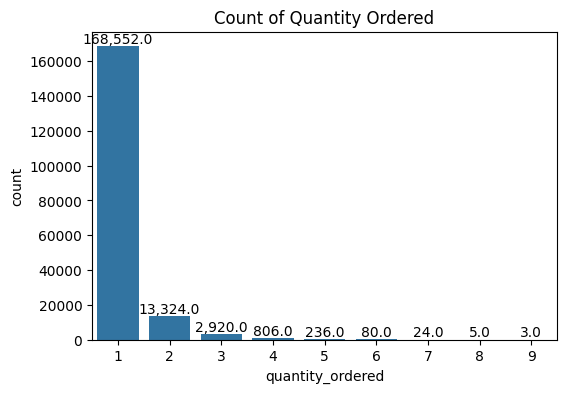

In [33]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='quantity_ordered', data=df)
plt.title("Count of Quantity Ordered")

# Tambahkan angka setiap diatas countplot nya agar jelas informasi quantity nya
for p in ax.patches:
  height = p.get_height()
  ax.annotate(f'{height:,}',
              (p.get_x() + p.get_width() / 2, height),
              ha='center', va='bottom',
              fontsize=10)
plt.show()


- Mayoritas transaksi membeli hanya 1 unit produk.

- Quantity 2–9 sangat jarang dan membentuk long-tail distribution.

- Ini menunjukkan sebagian besar pelanggan melakukan pembelian kecil/eceran, bukan bulk buying.

In [34]:
quantity_by_product = df.groupby('product')['quantity_ordered'].sum().reset_index().sort_values(by='quantity_ordered',ascending=False)
quantity_by_product

,product,quantity_ordered
5,AAA Batteries (4-pack),31017
4,AA Batteries (4-pack),27635
15,USB-C Charging Cable,23975
12,Lightning Charging Cable,23217
17,Wired Headphones,20557
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
2,27in FHD Monitor,7550
18,iPhone,6849
1,27in 4K Gaming Monitor,6244


In [35]:
top_10_quantity_by_product = quantity_by_product.head(10)
top_10_quantity_by_product

,product,quantity_ordered
5,AAA Batteries (4-pack),31017
4,AA Batteries (4-pack),27635
15,USB-C Charging Cable,23975
12,Lightning Charging Cable,23217
17,Wired Headphones,20557
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
2,27in FHD Monitor,7550
18,iPhone,6849
1,27in 4K Gaming Monitor,6244


/tmp/ipython-input-1158202868.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


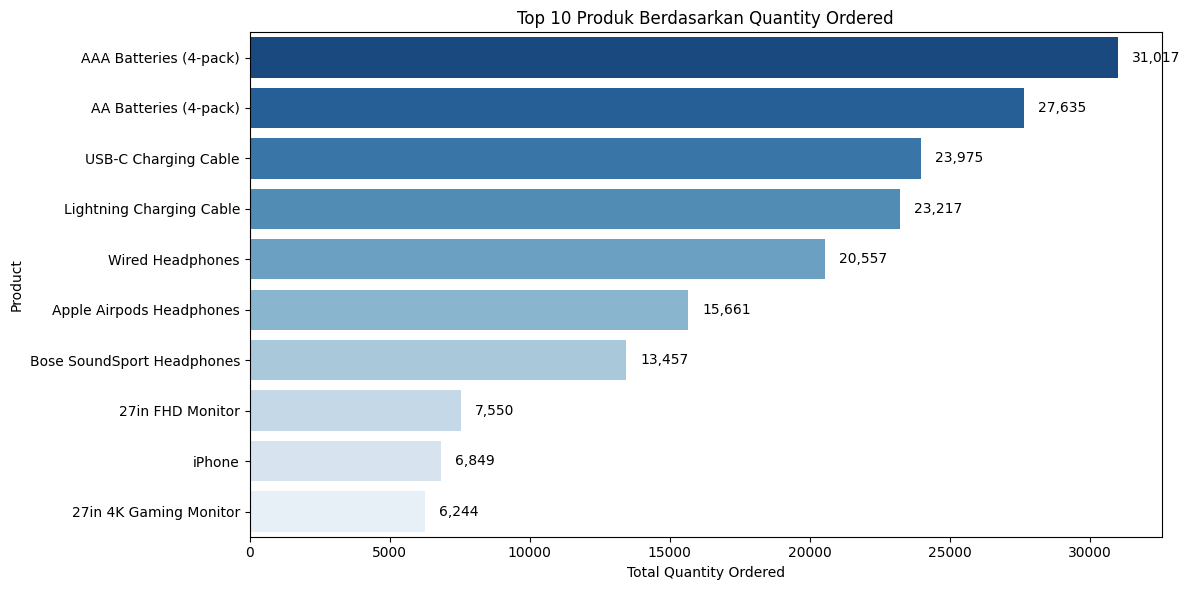

In [36]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=top_10_quantity_by_product,
    x='quantity_ordered',
    y='product',
    palette='Blues_r'
)

plt.title("Top 10 Produk Berdasarkan Quantity Ordered")
plt.xlabel("Total Quantity Ordered")
plt.ylabel("Product")

# Tambahkan angka di sisi kanan bar
for i, v in enumerate(top_10_quantity_by_product['quantity_ordered']):
    ax.text(
        v + 500,                       # posisi x sedikit ke kanan dari bar
        i,                             # posisi y sejajar bar
        f"{v:,}",                      # format angka pakai koma
        va='center',
        fontsize=10
    )

plt.tight_layout()
plt.show()


#### Price Each

<Axes: xlabel='price_each', ylabel='Count'>

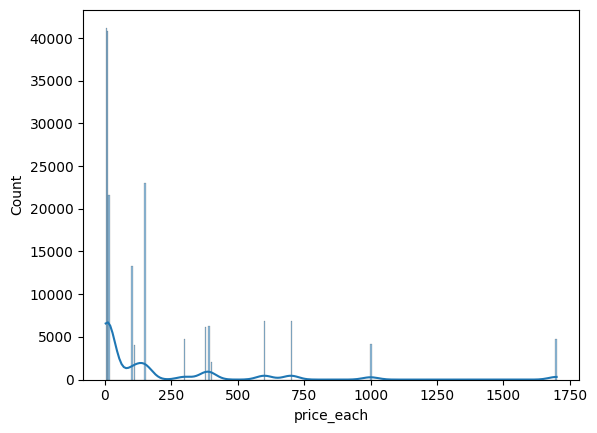

In [37]:
sns.histplot(df['price_each'], kde=True)


In [38]:
df['price_each'].value_counts()

,count
price_each,
11.95,21903
14.95,21658
2.99,20641
3.84,20577
11.99,18882
150.00,15549
99.99,13325
149.99,7507
700.00,6842


- Distribusi harga sangat right-skewed (condong ke kanan).

- Banyak produk yang berada di rentang harga 3–20 USD

- Outlier harga tinggi (300–1700 USD) muncul, namun frekuensinya rendah.

- Puncak beberapa harga (11.95, 14.95, 150, 300, dll.) muncul karena katalog produk tetap.

#### GMV

<Axes: xlabel='gmv', ylabel='Count'>

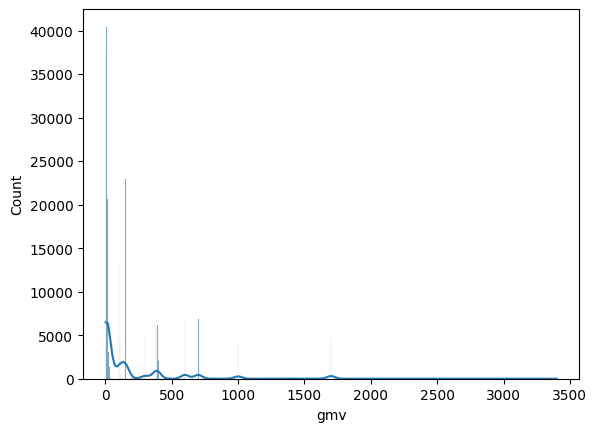

In [39]:
sns.histplot(df['gmv'], kde=True)


- Polanya hampir sama dengan price_each, karena GMV = qty × price.

- GMV kecil dominan (karena quantity mostly = 1 dan harga kecil).

- Ada GMV tinggi akibat produk mahal (monitor/laptop) dan quantity > 1.

## Analisis Trend dan Pola

### Tren Harian

In [40]:
ts_daily = df.groupby('date')['gmv'].sum().reset_index()
ts_daily.rename(columns={'order_date':'date', 'gmv':'daily_gmv'}, inplace=True)
ts_daily.head()

,date,daily_gmv
0,2019-01-01,65681.94
1,2019-01-02,70813.20
2,2019-01-03,47046.20
3,2019-01-04,62012.21
4,2019-01-05,46524.63


### Plot Time Series Harian

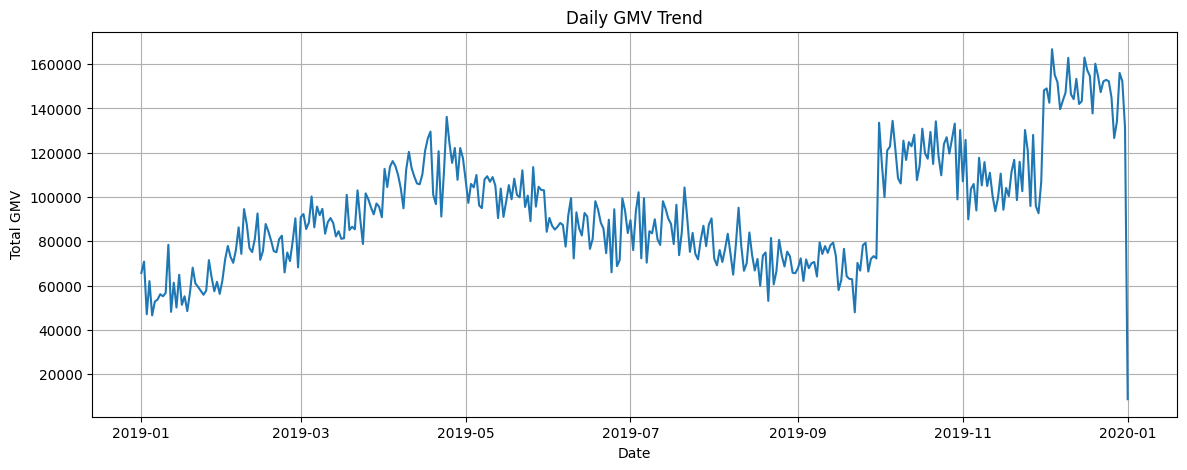

In [41]:
plt.figure(figsize=(14,5))
plt.plot(ts_daily['date'], ts_daily['daily_gmv'])
plt.title("Daily GMV Trend")
plt.xlabel("Date")
plt.ylabel("Total GMV")
plt.grid(True)
plt.show()


Insight :
- Pola harian terlihat cukup fluktuatif, dengan visual naik turun yang cukup tajam setiap hari. Hal ini wajar karena data transaksi harian sangat sensitif terhadap frekuensi order
- Periode Januari - April menunjukkan trend naik, menandakan adanya kenaikan penjualan  memasuki Q2.
- Pada periode Mei-September terjadi penurunan GMV secara bertahap, yang menunjukan perlambatan aktivitas transaksi.
- Mulai Oktober sampai Desember GMV naik signifikan, kemungkinan dipengaruhi oleh musim belanja akhir tahun, promo hari besar
- Tanggal akhir Desember - awal Januari 2020 menurun drastis, yang disebabkan oleh incomplete data tahun 2020 (hanya sebagian hari)

Kesimpulan:
Daily GMV memiliki volatilitas tinggi, namun menunjukkan pola musiman (seasonal) yang kuat, trend naik menjelang akhir tahun.

### Tren Mingguan

In [42]:
ts_weekly = df.groupby(['year', 'week'])['gmv'].sum().reset_index()


In [43]:
ts_weekly.head()

,year,week,gmv
0,2019,1,628629.78
1,2019,2,409428.28
2,2019,3,394936.90
3,2019,4,426632.16
4,2019,5,460355.55


### Plot Time Series Mingguan

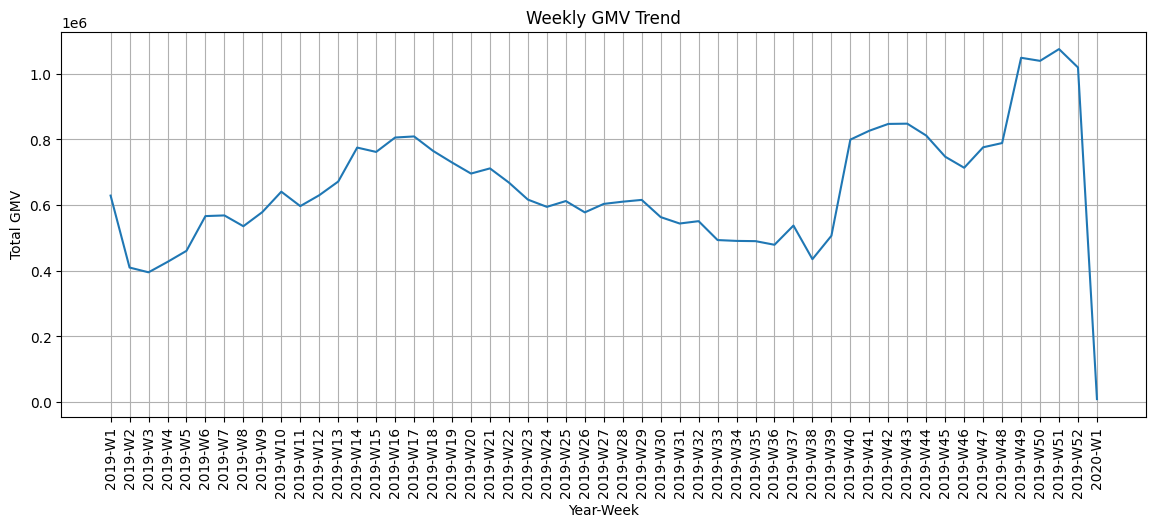

In [44]:
ts_weekly['year_week'] = ts_weekly['year'].astype(str) + '-W' + ts_weekly['week'].astype(str)

plt.figure(figsize=(14,5))
plt.plot(ts_weekly['year_week'], ts_weekly['gmv'])
plt.xticks(rotation=90)
plt.title("Weekly GMV Trend")
plt.xlabel("Year-Week")
plt.ylabel("Total GMV")
plt.grid(True)
plt.show()

Insight:
- Secara mingguan, pola terlihat smooth dibanding harian, karena efek fluktuasi berkurang.
- Week 1 mengalami GMV sangat tinggi, lalu terjadi penurunan pada Week 2-3, kemungkinan karena efek awal tahun
- Week 10-20 (Maret-Mei) menunjukkan peninngkatan stabil, konsisten dengan pola yang terlihat pada daily chart
- Week 25-35 terjadi penurunan, mencerminkan masa low season pada pertengahan tahun
- Week 40-48 GMV kembali meningkat signifikan, lalu mencapai puncak pada week 50-51

### Trend Bulanan

In [45]:
ts_monthly = df.groupby(['year','month'])['gmv'].sum().reset_index()
ts_monthly.head()

,year,month,gmv
0,2019,1,1813586.44
1,2019,2,2202022.42
2,2019,3,2807100.38
3,2019,4,3390670.24
4,2019,5,3152606.75


### Plot Time Series Bulanan

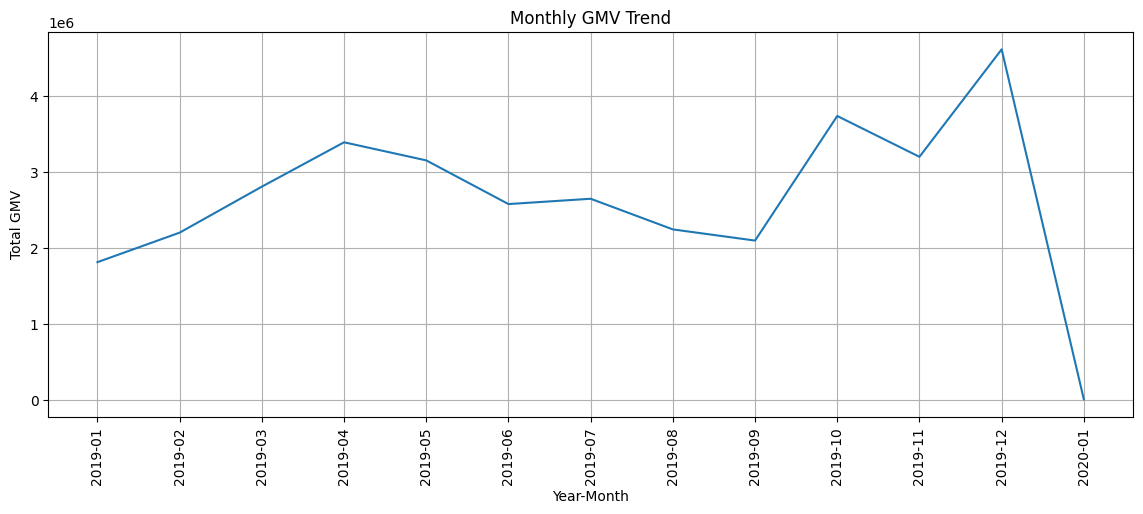

In [46]:
ts_monthly['year_month'] = ts_monthly['year'].astype(str) + '-' + ts_monthly['month'].astype(str).str.zfill(2)

plt.figure(figsize=(14,5))
plt.plot(ts_monthly['year_month'], ts_monthly['gmv'])
plt.title("Monthly GMV Trend")
plt.xlabel("Year-Month")
plt.ylabel("Total GMV")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

Insight:
- Dari Januari → April terlihat Trend naik yang konsisten, menunjukkan peningkatan aktivitas penjualan di Q1-Q2
- Dari April → September trend cenderung mengalami penurunan
- Dari Oktober → Desember trend kembali naik, Desember menjadi puncak GMV (bulan terbaik)

Ringkasan dari pola harian, mingguan, dan bulanan:
- Terdapat Seasonality kuat pada data GMV
- Akhir tahun selalu menjadi puncak penjualan.
- Low Season terjadi pada bulan Juni - September

# Uji ADF

## Import Library untuk Uji ADF

In [47]:
!pip install statsmodels
from statsmodels.tsa.stattools import adfuller

## Lakukan Uji ADF

Cek apakah data sales penjualan 2019 termasuk Stationary atau Non-Stationary

Buat kolom datetime pada trend bulanan

In [48]:
ts_daily.head()

,date,daily_gmv
0,2019-01-01,65681.94
1,2019-01-02,70813.20
2,2019-01-03,47046.20
3,2019-01-04,62012.21
4,2019-01-05,46524.63


In [50]:
ts_daily['date'] = pd.to_datetime(ts_daily['date'])
ts_daily = ts_daily.sort_values('date').reset_index(drop=True)
ts_daily = ts_daily.set_index('date')
ts_daily = ts_daily.asfreq('D')
ts_daily['daily_gmv'] = ts_daily['daily_gmv'].astype(float)

ts_daily.head()


,daily_gmv
date,
2019-01-01,65681.94
2019-01-02,70813.20
2019-01-03,47046.20
2019-01-04,62012.21
2019-01-05,46524.63


Cek Stationary (ADF)

In [52]:
def adf_test(series, title=''):
    print(f'== ADF Test: {title} ==')
    res = adfuller(series.dropna())
    print('ADF Statistic:', res[0])
    print('p-value:', res[1])
    for k, v in res[4].items():
        print('Critical Value (%s): %.3f' % (k, v))
    return res

adf_res = adf_test(ts_daily['daily_gmv'], 'Daily GMV')


== ADF Test: Daily GMV ==
ADF Statistic: -2.3508591590746564
p-value: 0.1560888501412367
Critical Value (1%): -3.449
Critical Value (5%): -2.870
Critical Value (10%): -2.571


Bedasarkan Uji ADF dapat kita ketahui bahwa data tersebut bersifat Non-Stationary, sehingga perlu dilakukan metode seperti Differencing, Log Transform, Detrending, ataupun Deseasonalizing sampai hasil Uji ADF menunjukan p-value < 0.05 (Stationary)

Pastikan Index Datetime dan Frekuensi Daily

In [57]:
ts_daily = ts_daily.sort_index()

# Pastikan Frekuensi daily (akan menambahkan NaN jika ada tanggal kosong)
ts_daily = ts_daily.asfreq('D')
# Jika ada nilai NaN isi dengan angka 0
ts_daily['daily_gmv'] = ts_daily['daily_gmv'].fillna(0)
ts_daily.head()

,daily_gmv
date,
2019-01-01,65681.94
2019-01-02,70813.20
2019-01-03,47046.20
2019-01-04,62012.21
2019-01-05,46524.63


Visual & ADF sebelum Transform

== ADF Test: Daily GMV (raw) ==
ADF Statistic: -2.3508591590746564
p-value: 0.1560888501412367
Critical Value (1%): -3.449
Critical Value (5%): -2.870
Critical Value (10%): -2.571


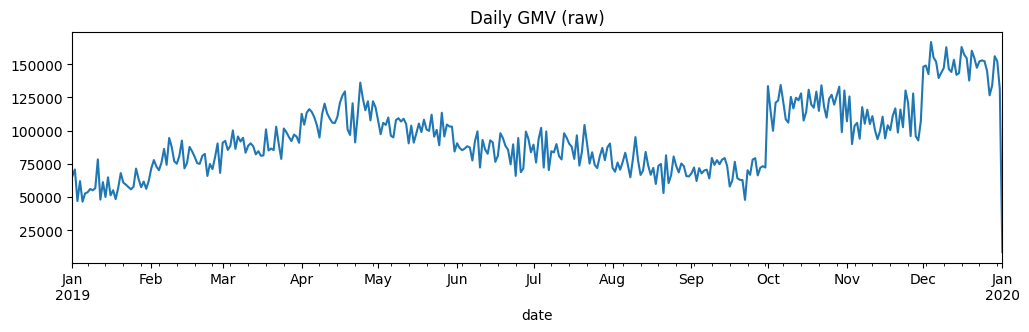

In [58]:
ts_daily['daily_gmv'].plot(figsize=(12,3), title='Daily GMV (raw)')

adf_res_raw = adf_test(ts_daily['daily_gmv'], 'Daily GMV (raw)')

### Kesimpulan Uji ADF

Data belum Stationary, mari kita lakukan 4 metode antara Differencing, Detrending, Log Transform, atau Deseasonalizing.

Coba gunakan Deseasonalizing (Lag = 7)

In [59]:
ts_daily['diff_season_7'] = ts_daily['daily_gmv'].diff(7)
ts_daily

,daily_gmv,diff_season_7
date,,
2019-01-01,65681.94,NaN
2019-01-02,70813.20,NaN
2019-01-03,47046.20,NaN
2019-01-04,62012.21,NaN
2019-01-05,46524.63,NaN
2019-01-06,52777.49,NaN
2019-01-07,53676.42,NaN
2019-01-08,56112.47,-9569.47
2019-01-09,55153.13,-15660.07


Lakukan Uji ADF kembali setelah menggunakan Deseasonalizing 7

In [60]:
adf_res_season7 = adf_test(ts_daily['diff_season_7'].dropna(), 'Daily GNV Diff Season 7')

== ADF Test: Daily GNV Diff Season 7 ==
ADF Statistic: -3.371217997606885
p-value: 0.011980065073195526
Critical Value (1%): -3.450
Critical Value (5%): -2.870
Critical Value (10%): -2.571


# Split Train-Test

In [61]:
from sklearn.metrics import mean_absolute_percentage_error

# Gunakan diff_season_7 karena sudah stationary
data = ts_daily[['diff_season_7']].dropna()

train = data.iloc[:-30]
test = data.iloc[-30:]

# SARIMA

In [62]:
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_models = {
    "SARIMA_101_111": ((1,0,1),(1,1,1)),
    "SARIMA_001_111": ((0,0,1),(1,1,1)),
    "SARIMA_100_111": ((1,0,0),(1,1,1)),
}

sarima_results = {}

for name, ((p,d,q),(P,D,Q)) in sarima_models.items():
    model = SARIMAX(train['diff_season_7'],
                    order=(p,d,q),
                    seasonal_order=(P,D,Q,7),
                    enforce_stationarity=False,
                    enforce_invertibility=False)

    fit = model.fit()
    forecast = fit.forecast(steps=len(test))

    mape = mean_absolute_percentage_error(test, forecast)
    sarima_results[name] = mape

    print(f"{name} → MAPE = {mape:.4f}")

SARIMA_101_111 → MAPE = 2.6493
SARIMA_001_111 → MAPE = 2.1996
SARIMA_100_111 → MAPE = 2.3911


# Exponential Smoothing

In [63]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

hw_model = ExponentialSmoothing(
    train['diff_season_7'],
    seasonal_periods=7,
    trend="add",
    seasonal="add"
).fit()

hw_forecast = hw_model.forecast(len(test))
mape_hw = mean_absolute_percentage_error(test, hw_forecast)

print(f"Exponential Smoothing → MAPE = {mape_hw:.4f}")

Exponential Smoothing → MAPE = 5.6418


# Pilih Model Terbaik

In [64]:
all_results = sarima_results.copy()
all_results["ExponentialSmoothing"] = mape_hw

print("\n===== SUMMARY MAPE =====")
for model, mape in all_results.items():
    print(f"{model} : MAPE = {mape:.4f}")

best_model = min(all_results, key=all_results.get)

print(f"\nBest Model: {best_model} (MAPE = {all_results[best_model]:.4f})")



===== SUMMARY MAPE =====
SARIMA_101_111 : MAPE = 2.6493
SARIMA_001_111 : MAPE = 2.1996
SARIMA_100_111 : MAPE = 2.3911
ExponentialSmoothing : MAPE = 5.6418

Best Model: SARIMA_001_111 (MAPE = 2.1996)


SARIMA_001_111 adalah Model dengan error paling kecil (MAPE ≈ 2.20%) artinya prediksi cukup akurat → error rata-rata hanya sekitar 2.2% dari nilai aktual

Model SARIMA jauh lebih akurat dibandingkan Exponential Smoothing, artinya:
- Data memiliki pola musiman (seasonality) yang lebih efektif ditangkap SARIMA
- ES tidak mampu menangkap struktur data secara penuh

SARIMA(0,0,1):

| Parameter | Arti | Interpretasi |
|:---------:|:----:|:------------:|
| p = 0     | AR order | Tidak ada Autoregressive jangka pendek |
| d = 0     | Differencing | Tidak perlu differencing non-seasonal |
| q = 1     | MA order | Prediksi bergantung pada error sebelumnya (1 lag MA) |

Data tidak memiliki pola autoregressive jangka pendek, namun MA(1) cukup membantu modeling Jangka Pendek.

SARIMA (1,1,1):

| Parameter | Arti | Interpretasi |
|:---------:|:----:|:------------:|
| P = 1     | Seasonal AR | Ada hubungan antara nilai hari ini dengan nilai 12 hari (atau 12 periode) sebelumnya |
| D = 1     | Seasonal Differencing | Menghilangkan pola musiman 12-periode |
| Q = 1     | Seasonal MA | Menggunakan error musiman sebelumnya |
| M = 12    | Period   | Musim berulang setiap 12 periode |

Interpretasi Seasonal:

Data memiliki pola berulang (seasonality), dan pola itu sangat kuat sehingga komponen seasonal ARIMA sangat berpengaruh

Insight Bisnis:  
Model SARIMA(0,0,1)(1,1,1)[12] memberikan performa terbaik dengan MAPE sekitar 2.19%. Ini berarti model mampu memprediksi transaksi harian dengan tingkat akurasi sekitar 98%. Pola musiman dalam transaksi sangat kuat, sehingga model harus menggunakan komponen seasonal ARIMA lengkap (P=1, D=1, Q=1). Model ini menunjukkan bahwa perilaku transaksi sangat dipengaruhi pola berulang, misalnya pola mingguan atau siklus operasional tertentu, dan informasi ini dapat membantu tim bisnis dalam perencanaan stok, jadwal operasional, dan kampanye pemasaran.

Perbandingan antara SARIMA dengan Exponential Smoothing

Selain membandingkan antar kandidat SARIMA, hasil evaluasi menunjukkan bahwa Exponential Smoothing (MAPE ≈ 5.64%) memiliki performa yang jauh lebih rendah dibandingkan seluruh model SARIMA.
Ini berarti:

SARIMA jauh lebih mampu menangkap pola musiman harian pada data GMV.

Exponential Smoothing gagal memodelkan pola musiman yang kompleks, karena metode ini hanya mengandalkan smoothing komponen level/trend/seasonal sederhana, sehingga tidak cukup fleksibel untuk pola musiman 12-periode yang kuat seperti di dataset ini.

Hal ini terlihat dari perbedaan MAPE yang signifikan:

SARIMA terbaik: ≈ 2.19% error

Exponential Smoothing: ≈ 5.64% error

Dengan kata lain, SARIMA lebih sesuai untuk dataset ini karena mampu menangkap kombinasi pola musiman dan noise dengan lebih detail, sementara Exponential Smoothing bekerja baik pada pola yang lebih stabil dan tidak terlalu fluktuatif.

# Forecast 30 hari kedepan

In [65]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Gunakan data asli daily_gmv (bukan differenced)
y = ts_daily['daily_gmv']

# Fit ulang SARIMA terbaik: (0,0,1)(1,1,1)[12]
best_model = SARIMAX(
    y,
    order=(0,0,1),
    seasonal_order=(1,1,1,12),
    enforce_stationarity=False,
    enforce_invertibility=False
).fit()

print(best_model.summary())


                                     SARIMAX Results                                      
Dep. Variable:                          daily_gmv   No. Observations:                  366
Model:             SARIMAX(0, 0, 1)x(1, 1, 1, 12)   Log Likelihood               -3814.621
Date:                            Fri, 05 Dec 2025   AIC                           7637.241
Time:                                    12:38:48   BIC                           7652.557
Sample:                                01-01-2019   HQIC                          7643.344
                                     - 01-01-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4521      0.062      7.273      0.000       0.330       0.574
ar.S.L12      -0.0586      0.208   

Hasil summary menunjukkan bahwa model SARIMA berhasil menangkap pola musiman pada data. Hal ini terlihat dari parameter musiman seperti MA(S).L12 dan AR(S).L12 yang memiliki nilai p-value kecil (signifikan), sehingga model mampu merepresentasikan hubungan berulang setiap 12 periode dengan baik. Selain itu, nilai AIC dan BIC yang relatif rendah menandakan bahwa model ini memiliki tingkat kompleksitas yang efisien dan cocok untuk data harian yang memiliki pola musiman kuat.

Beberapa indikator diagnostik juga menunjukkan bahwa model bekerja stabil, seperti nilai Ljung-Box (Q) yang kecil, yang menandakan residual model tidak memiliki autocorrelation yang kuat. Kombinasi faktor-faktor ini menunjukkan bahwa model SARIMA yang digunakan sudah sesuai dan mampu menggambarkan struktur pola historis dengan baik untuk digunakan dalam proses forecasting.

In [67]:
# Forecast 30 hari ke depan
n_forecast = 30
forecast_30 = best_model.forecast(steps=n_forecast)

forecast_30


,predicted_mean
2020-01-02,85740.862143
2020-01-03,144481.711521
2020-01-04,143064.127308
2020-01-05,144016.735176
2020-01-06,150383.948387
2020-01-07,143045.602859
2020-01-08,131441.409505
2020-01-09,143715.247996
2020-01-10,153876.451597
2020-01-11,151495.423837


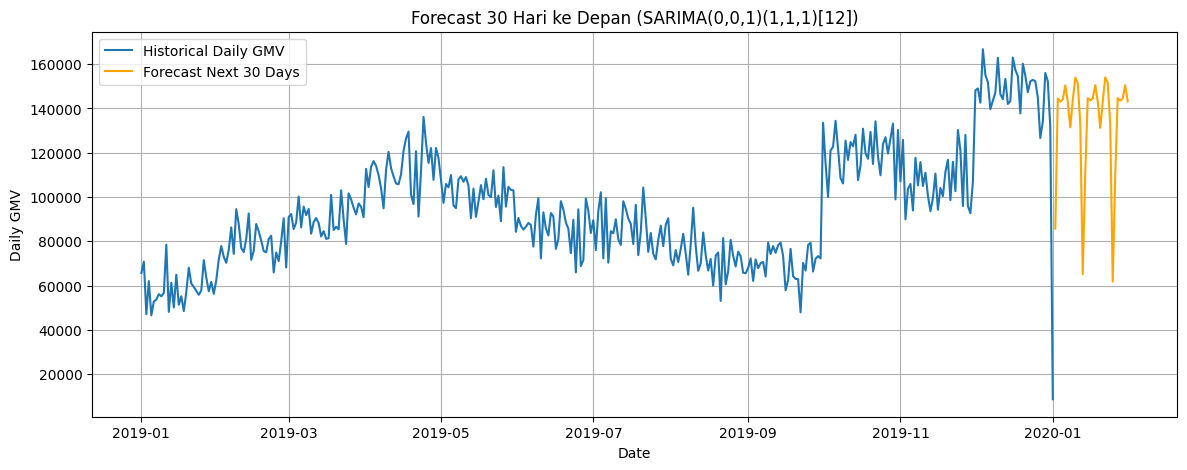

In [68]:
plt.figure(figsize=(14,5))
plt.plot(ts_daily.index, ts_daily['daily_gmv'], label='Historical Daily GMV')
plt.plot(forecast_30.index, forecast_30, label='Forecast Next 30 Days', color='orange')

plt.title("Forecast 30 Hari ke Depan (SARIMA(0,0,1)(1,1,1)[12])")
plt.xlabel("Date")
plt.ylabel("Daily GMV")
plt.legend()
plt.grid(True)
plt.show()


Hasil forecasting menunjukkan bahwa 30 hari pertama di tahun 2020 diprediksi memiliki tingkat GMV harian yang relatif stabil, berada di kisaran 120.000 – 150.000. Pola ini konsisten dengan tren musiman di akhir tahun 2019, di mana terjadi peningkatan permintaan sebelum kemudian kembali ke pola normal.

Model SARIMA menangkap pola musiman mingguan & bulanan dengan baik, sehingga prediksi menunjukkan fluktuasi halus yang mirip dengan pergerakan historis. Tidak terlihat lonjakan ekstrem atau penurunan drastis yang tidak wajar, sehingga hasil ini dapat dianggap realistis dan dapat dipakai untuk perencanaan bisnis.

Secara bisnis, hasil ini memberikan gambaran bahwa awal tahun tidak menunjukkan adanya risiko penurunan performa yang signifikan, sehingga perusahaan dapat mempertahankan strategi operasional dan kapasitas stok pada level yang sama dengan akhir tahun sebelumnya.

### Insight Bisnis


Stabilitas Demand - Produksi dan Inventory bisa tetap Konsisten  
Tidak ada lonjakan drastis atau penurunan abnormal dalam 30 hari kedepan.
Artinya:
- Tidak perlu menambah kapasitas produksi, setelah peak season Desember
- Stok dapat dikelola secara stabil tanpa risiko overstock

Q1 Cenderung Lebih rendah dari Q4 tapi tidak drop tajam

Musim belanja akhir tahun (oktober-desember) memang tinggi. Setelah itu GMV turun sedikit tetapi stabil, artinya:
- Tidak perlu heavy marketing di awal tahun (ROI rendah)
- Fokus di retargeting ringan atau awareness campaign

Budget Marketing dapat dialokasikan ke Periode Lain
Karena 30 hari kedepan cenderung tenang, strateginya adalah:
- Kurangi budget iklan pada periode rendah konversi di awal tahun
- Simpan budget untuk event besar seperti Q2/Q3 sales campaign

# Pertanyaan yang Perlu dijawab

## 1. Hitunglah total revenue, jumlah order, dan jumlah barang yang terjual sepanjang tahun 2019. Selain itu, hitung rata-rata jumlah barang yang dibeli per transaksi dan rata-rata spending per transaksi.

In [69]:
df.head()

,order_id,product,quantity_ordered,price_each,gmv,order_date,hour,date,day,week,month,year,purchase_address,city,state,zip_code
0,141234,iPhone,1,700.00,700.00,2019-01-22 21:25:00,21,2019-01-22,22,4,1,2019,"944 Walnut St, Boston, MA 02215",Boston,MA,02215
1,141235,Lightning Charging Cable,1,14.95,14.95,2019-01-28 14:15:00,14,2019-01-28,28,5,1,2019,"185 Maple St, Portland, OR 97035",Portland,OR,97035
2,141236,Wired Headphones,2,11.99,23.98,2019-01-17 13:33:00,13,2019-01-17,17,3,1,2019,"538 Adams St, San Francisco, CA 94016",San Francisco,CA,94016
3,141237,27in FHD Monitor,1,149.99,149.99,2019-01-05 20:33:00,20,2019-01-05,5,1,1,2019,"738 10th St, Los Angeles, CA 90001",Los Angeles,CA,90001
4,141238,Wired Headphones,1,11.99,11.99,2019-01-25 11:59:00,11,2019-01-25,25,4,1,2019,"387 10th St, Austin, TX 73301",Austin,TX,73301


Karena yang diminta tahun 2019 saja pastikan tahun hanya tahun 2019 saja, tidak mengandung tahun 2020

In [70]:
# Pastikan hanya data tahun 2019
df_2019 = df[df['year'] == 2019]

Total Revenue

In [72]:
total_revenue = df_2019['gmv'].sum()
total_revenue

np.float64(34483365.67999999)

Total Revenue adalah $ 34.483.365.67

Jumlah Order

In [73]:
total_order = df_2019['order_id'].nunique()
total_order

178406

Total order adalah sebanyak 178.406 order id

Total quantity

In [74]:
total_quantity = df_2019['quantity_ordered'].sum()
total_quantity

np.int64(209038)

Average Quantity per Order

In [75]:
qty_per_order = df_2019.groupby('order_id')['quantity_ordered'].sum()
avg_quantity_per_order = qty_per_order.mean()
avg_quantity_per_order

np.float64(1.17169826126924)

Average Spending per Transaction

In [76]:
gmv_per_order = df_2019.groupby('order_id')['gmv'].sum()
avg_spending_per_order = gmv_per_order.mean()
avg_spending_per_order

np.float64(193.2859078730536)

In [77]:
print("Total Revenue 2019: $", round(total_revenue, 2))
print("Total Orders 2019:", total_order)
print("Total Quantity 2019:", total_quantity)
print("Average Quantity per Order:", round(avg_quantity_per_order, 2))
print("Average Spending per Transaction: $", round(avg_spending_per_order, 2))

Total Revenue 2019: $ 34483365.68
Total Orders 2019: 178406
Total Quantity 2019: 209038
Average Quantity per Order: 1.17
Average Spending per Transaction: $ 193.29


## 2. Hitunglah jumlah order dan GMV yang diperoleh dengan rentang waktu berikut:  
## a. Harian  
## b. Mingguan  
## c. Bulanan


In [81]:
# Daily orders & GMV
daily_stats = df.groupby('date').agg(
    total_orders = ('order_id', 'nunique'),
    total_gmv = ('gmv', 'sum')
).reset_index()

daily_stats.head()


,date,total_orders,total_gmv
0,2019-01-01,287,65681.94
1,2019-01-02,308,70813.20
2,2019-01-03,286,47046.20
3,2019-01-04,282,62012.21
4,2019-01-05,301,46524.63


In [82]:
# Weekly orders & GMV
weekly_stats = df.groupby(['year', 'week']).agg(
    total_orders = ('order_id', 'nunique'),
    total_gmv = ('gmv', 'sum')
).reset_index()

# (Optional) buat label week seperti 2019-W01
weekly_stats['year_week'] = weekly_stats['year'].astype(str) + "-W" + weekly_stats['week'].astype(str)

weekly_stats.head()


,year,week,total_orders,total_gmv,year_week
0,2019,1,3259,628629.78,2019-W1
1,2019,2,2104,409428.28,2019-W2
2,2019,3,2104,394936.90,2019-W3
3,2019,4,2134,426632.16,2019-W4
4,2019,5,2381,460355.55,2019-W5


In [83]:
# Monthly orders & GMV
monthly_stats = df.groupby(['year', 'month']).agg(
    total_orders = ('order_id', 'nunique'),
    total_gmv = ('gmv', 'sum')
).reset_index()

# (Optional) format month menjadi YYYY-MM
monthly_stats['year_month'] = monthly_stats['year'].astype(str) + "-" + monthly_stats['month'].astype(str).str.zfill(2)

monthly_stats.head()


,year,month,total_orders,total_gmv,year_month
0,2019,1,9262,1813586.44,2019-01
1,2019,2,11496,2202022.42,2019-02
2,2019,3,14549,2807100.38,2019-03
3,2019,4,17528,3390670.24,2019-04
4,2019,5,15836,3152606.75,2019-05


In [84]:
# Rata-rata harian
avg_daily_orders  = daily_stats['total_orders'].mean()
avg_daily_gmv     = daily_stats['total_gmv'].mean()

# Rata-rata mingguan
avg_weekly_orders = weekly_stats['total_orders'].mean()
avg_weekly_gmv    = weekly_stats['total_gmv'].mean()

# Rata-rata bulanan
avg_monthly_orders = monthly_stats['total_orders'].mean()
avg_monthly_gmv    = monthly_stats['total_gmv'].mean()

# Print hasilnya rapi
print("Average daily orders  :", f"{avg_daily_orders:,.2f}")
print("Average daily GMV     :", f"{avg_daily_gmv:,.2f}")
print()
print("Average weekly orders :", f"{avg_weekly_orders:,.2f}")
print("Average weekly GMV    :", f"{avg_weekly_gmv:,.2f}")
print()
print("Average monthly orders:", f"{avg_monthly_orders:,.2f}")
print("Average monthly GMV   :", f"{avg_monthly_gmv:,.2f}")


# --- Untuk menghitung rata-rata per transaksi (order_id) ---
# (ini jawab pertanyaan kamu: "rata-rata barang per transaksi" dan "average spending per transaction")
order_stats = df.groupby('order_id').agg(
    items_per_order = ('quantity_ordered', 'sum'),
    spend_per_order = ('gmv', 'sum')
).reset_index()

avg_items_per_order     = order_stats['items_per_order'].mean()
avg_spend_per_order     = order_stats['spend_per_order'].mean()

print()
print("Average items per order (mean qty per order) :", f"{avg_items_per_order:,.3f}")
print("Average spend per order (mean GMV per order) :", f"{avg_spend_per_order:,.2f}")

Average daily orders  : 487.53
Average daily GMV     : 94,240.54

Average weekly orders : 3,366.74
Average weekly GMV    : 650,793.13

Average monthly orders: 13,725.92
Average monthly GMV   : 2,653,233.54

Average items per order (mean qty per order) : 1.172
Average spend per order (mean GMV per order) : 193.30


## 4. Tim marketing ingin mengetahui produk apa saja yang paling sering dibeli dalam 1 tahun terakhir. Rencananya, mereka akan mencoba mem-bundling top produk ini untuk meningkatkan penjualan. Identifikasi top 10 produk yang membawa revenue terbesar dalam 3 bulan terakhir dan produk apa saja yang bisa di-bundling berdasarkan hasil analisis.

In [87]:
# Top produk paling sering dibeli (berdasarkan kuantitas)
top_products_qty = (
    df_2019.groupby('product')['quantity_ordered']
           .sum()
           .sort_values(ascending=False)
           .head(10)
           .reset_index()
)

top_products_qty

,product,quantity_ordered
0,AAA Batteries (4-pack),31012
1,AA Batteries (4-pack),27635
2,USB-C Charging Cable,23971
3,Lightning Charging Cable,23211
4,Wired Headphones,20553
5,Apple Airpods Headphones,15657
6,Bose SoundSport Headphones,13454
7,27in FHD Monitor,7547
8,iPhone,6847
9,27in 4K Gaming Monitor,6243


In [90]:
df_last_3month = df[(df['year'] == 2019) & (df['month'].isin([10,11,12]))]

top_product_revenue_3m = (
    df_last_3month.groupby('product')['gmv']
      .sum()
      .sort_values(ascending=False)
      .head(10)
      .reset_index()
)

top_product_revenue_3m

,product,gmv
0,Macbook Pro Laptop,2733600.00
1,iPhone,1600900.00
2,ThinkPad Laptop,1373986.26
3,Google Phone,1083000.00
4,27in 4K Gaming Monitor,843158.38
5,Apple Airpods Headphones,789000.00
6,34in Ultrawide Monitor,786959.29
7,Flatscreen TV,495000.00
8,Bose SoundSport Headphones,454054.59
9,27in FHD Monitor,370775.28


Product yang bisa di Bundling

In [92]:
bundle_candidates = pd.merge(
    top_products_qty,
    top_product_revenue_3m,
    on='product',
    how='outer',
    suffixes=('_qty', '_revenue')
)

bundle_candidates

,product,quantity_ordered,gmv
0,27in 4K Gaming Monitor,6243.0,843158.38
1,27in FHD Monitor,7547.0,370775.28
2,34in Ultrawide Monitor,NaN,786959.29
3,AA Batteries (4-pack),27635.0,NaN
4,AAA Batteries (4-pack),31012.0,NaN
5,Apple Airpods Headphones,15657.0,789000.00
6,Bose SoundSport Headphones,13454.0,454054.59
7,Flatscreen TV,NaN,495000.00
8,Google Phone,NaN,1083000.00
9,Lightning Charging Cable,23211.0,NaN


Kemunculan nilai NaN terjadi karena tidak semua produk yang paling sering dibeli juga menjadi produk dengan revenue tertinggi dalam 3 bulan terakhir, dan sebaliknya. Informasi ini justru membantu mengidentifikasi strategi bundling:

Produk dengan quantity tinggi tetapi revenue rendah cocok untuk bundling volume.

Produk dengan revenue tinggi tetapi quantity rendah cocok untuk premium bundling.

List Item Bundling:  
iPhone + lightning Cable
- Relevansi Tinggi
- Lightning Cable quantity tinggi → Fast Moving
- iPhone GMV tinggi → High-value

iPhone + Apple Airpods Headphones
- Satu ekosistem (Apple)
- Airpods memiliki GMV sangat tinggi 790K
- Meningkatkan average order value

Macbook / ThinkPad / GooglePhone + USB-C Cable
- USB-C cable quantity sangat tinggi (~24K Unit)
- Semua device modern menggunakan USB-C

## 5. Identifikasi top 5 kota yang memiliki order terbanyak dan 5 kota yang memiliki total dan rata-rata spending terbesar.

Top 5 Kota Berdasarkan Jumlah Order:


,city,total_orders,total_gmv,avg_spend_per_order
7,San Francisco,"42,898","8,262,204",192.60
4,Los Angeles,"28,498","5,452,571",191.33
5,New York City,"23,848","4,664,317",195.59
2,Boston,"19,092","3,661,642",191.79
0,Atlanta,"14,253","2,795,499",196.13



Top 5 Kota Berdasarkan Total GMV:


,city,total_orders,total_gmv,avg_spend_per_order
7,San Francisco,"42,898","8,262,204",192.60
4,Los Angeles,"28,498","5,452,571",191.33
5,New York City,"23,848","4,664,317",195.59
2,Boston,"19,092","3,661,642",191.79
0,Atlanta,"14,253","2,795,499",196.13



Top 5 Kota Berdasarkan Rata-rata Spending per Order (GMV / order):


,city,total_orders,total_gmv,avg_spend_per_order
0,Atlanta,"14,253","2,795,499",196.13
5,New York City,"23,848","4,664,317",195.59
8,Seattle,"14,119","2,747,755",194.61
3,Dallas,"14,240","2,767,975",194.38
6,Portland,"11,980","2,320,491",193.70


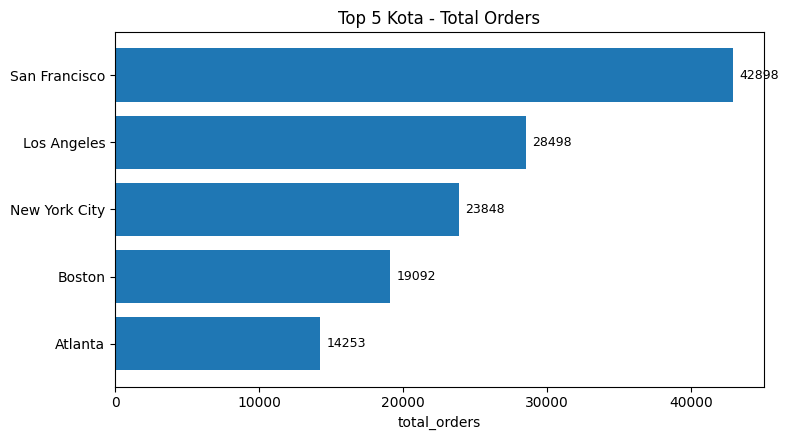

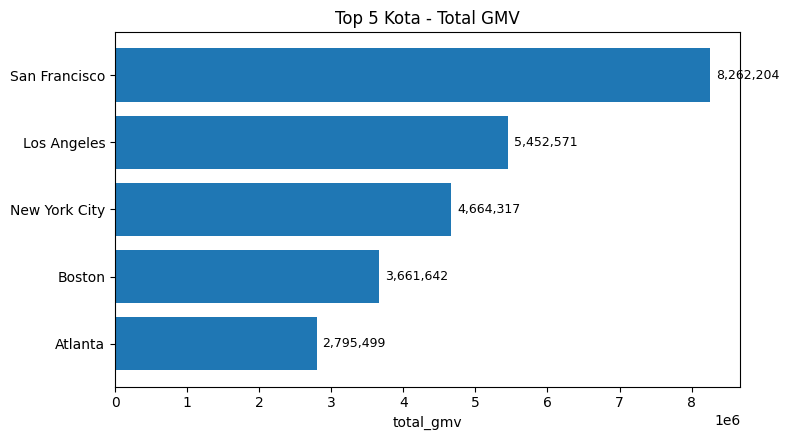

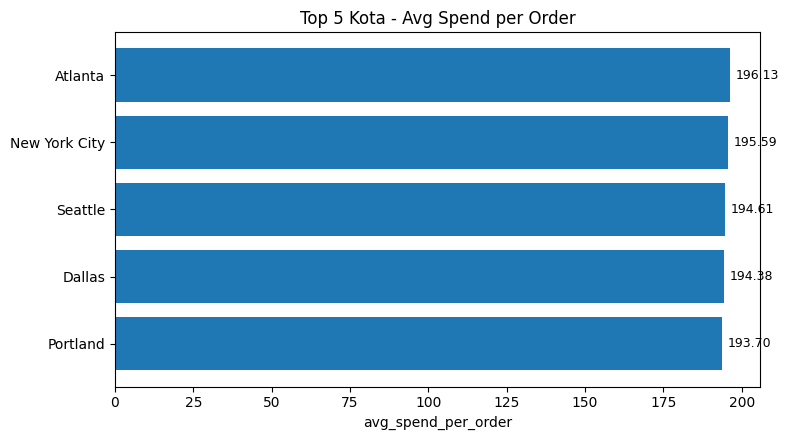

In [93]:
# 1) Agregasi per kota
city_stats = (
    df
    .groupby('city')
    .agg(
        total_orders = ('order_id', 'nunique'),
        total_gmv    = ('gmv', 'sum')
    )
    .reset_index()
)

# Hitung rata-rata spending per order pada tiap kota
city_stats['avg_spend_per_order'] = city_stats['total_gmv'] / city_stats['total_orders']

# Format kolom ke tipe numeric yang rapi (opsional)
city_stats['total_gmv'] = city_stats['total_gmv'].astype(float)
city_stats['avg_spend_per_order'] = city_stats['avg_spend_per_order'].astype(float)

# 2) Ambil Top 5 masing-masing metric
top5_by_orders = city_stats.sort_values('total_orders', ascending=False).head(5)
top5_by_gmv    = city_stats.sort_values('total_gmv', ascending=False).head(5)
top5_by_avg    = city_stats.sort_values('avg_spend_per_order', ascending=False).head(5)

# 3) Tampilkan tabel hasil
print("Top 5 Kota Berdasarkan Jumlah Order:")
display(top5_by_orders.style.format({'total_orders':'{:,}','total_gmv':'{:,.0f}','avg_spend_per_order':'{:,.2f}'}))

print("\nTop 5 Kota Berdasarkan Total GMV:")
display(top5_by_gmv.style.format({'total_orders':'{:,}','total_gmv':'{:,.0f}','avg_spend_per_order':'{:,.2f}'}))

print("\nTop 5 Kota Berdasarkan Rata-rata Spending per Order (GMV / order):")
display(top5_by_avg.style.format({'total_orders':'{:,}','total_gmv':'{:,.0f}','avg_spend_per_order':'{:,.2f}'}))


# 4) Simple barplots with annotations (visual)
def bar_with_values(df_plot, x, y, title, fmt='{:.0f}'):
    plt.figure(figsize=(8,4.5))
    ax = plt.barh(df_plot[x], df_plot[y])
    plt.gca().invert_yaxis()
    plt.title(title)
    plt.xlabel(y)
    # annotate values on bars
    for i, rect in enumerate(ax):
        width = rect.get_width()
        plt.text(width + (0.01 * max(df_plot[y])), rect.get_y() + rect.get_height()/2,
                 fmt.format(width), va='center', fontsize=9)
    plt.tight_layout()
    plt.show()

# Plot Top5 orders
bar_with_values(top5_by_orders, x='city', y='total_orders', title='Top 5 Kota - Total Orders', fmt='{:.0f}')

# Plot Top5 total GMV
bar_with_values(top5_by_gmv, x='city', y='total_gmv', title='Top 5 Kota - Total GMV', fmt='{:,.0f}')

# Plot Top5 avg spend per order
bar_with_values(top5_by_avg, x='city', y='avg_spend_per_order', title='Top 5 Kota - Avg Spend per Order', fmt='{:,.2f}')

San Francisco, Los Angeles, dan New York City muncul sebagai tiga kota paling dominan baik dari sisi jumlah order maupun total GMV, menunjukkan bahwa ketiga kota ini merupakan pasar inti dengan aktivitas transaksi dan kontribusi pendapatan tertinggi. Boston dan Atlanta juga konsisten masuk dalam lima besar sehingga tetap penting untuk operasional dan pemenuhan permintaan. Dari sisi rata-rata spending per order, kota seperti Atlanta, New York City, Seattle, dan Dallas memiliki nilai transaksi per pelanggan yang lebih tinggi, menandakan potensi kuat untuk strategi premium bundling, upselling, dan promosi produk bernilai tinggi. Secara keseluruhan, data menunjukkan kombinasi kota dengan volume tinggi (SF, LA, NYC) dan kota dengan nilai spending tinggi (Atlanta, NYC, Seattle) yang bisa menjadi fokus utama strategi pemasaran dan manajemen stok.

## 6. Tim marketing ingin mengetahui kapan penjualan mencapai titik tertinggi sehingga mereka bisa merancang strategi marketing. Analisis pada rentang jam berapa penjualan terjadi secara aktif (rush hour).


In [94]:
df.head()

,order_id,product,quantity_ordered,price_each,gmv,order_date,hour,date,day,week,month,year,purchase_address,city,state,zip_code
0,141234,iPhone,1,700.00,700.00,2019-01-22 21:25:00,21,2019-01-22,22,4,1,2019,"944 Walnut St, Boston, MA 02215",Boston,MA,02215
1,141235,Lightning Charging Cable,1,14.95,14.95,2019-01-28 14:15:00,14,2019-01-28,28,5,1,2019,"185 Maple St, Portland, OR 97035",Portland,OR,97035
2,141236,Wired Headphones,2,11.99,23.98,2019-01-17 13:33:00,13,2019-01-17,17,3,1,2019,"538 Adams St, San Francisco, CA 94016",San Francisco,CA,94016
3,141237,27in FHD Monitor,1,149.99,149.99,2019-01-05 20:33:00,20,2019-01-05,5,1,1,2019,"738 10th St, Los Angeles, CA 90001",Los Angeles,CA,90001
4,141238,Wired Headphones,1,11.99,11.99,2019-01-25 11:59:00,11,2019-01-25,25,4,1,2019,"387 10th St, Austin, TX 73301",Austin,TX,73301


In [95]:
# Hitung total GMV dan total order per jam
hourly_stats = df.groupby('hour').agg(
    total_orders = ('order_id', 'nunique'),
    total_gmv = ('gmv', 'sum')
).reset_index()

hourly_stats


,hour,total_orders,total_gmv
0,0,3758,713721.27
1,1,2255,460866.88
2,2,1196,234851.44
3,3,804,145757.89
4,4,814,162661.01
5,5,1259,230679.82
6,6,2375,448113.00
7,7,3836,744854.12
8,8,6036,1192348.97
9,9,8404,1639030.58


In [96]:
hourly_stats.sort_values(by='total_orders', ascending=False).head()


,hour,total_orders,total_gmv
19,19,12377,2412938.54
12,12,12082,2316821.34
11,11,11882,2300610.24
20,20,11763,2281716.24
18,18,11761,2219348.30


Hasil analisis menunjukkan bahwa jam dengan jumlah order tertinggi adalah:

19:00 (pukul 7 malam) → 12.377 order

12:00 (pukul 12 siang / lunch time) → 12.082 order

11:00 → 11.882 order

20:00 (pukul 8 malam) → 11.763 order

18:00 (pukul 6 sore) → 11.761 order

Pola ini sangat jelas: puncak aktivitas belanja terjadi pada waktu makan siang dan setelah jam kerja.

Strategi Bisnis:

- Jadwalkan push notification & email blast pada jam 11.00–12.00 & 18.00–20.00
Karena ini adalah jam dengan konversi tertinggi → iklan lebih efektif & ROI meningkat.

- Flash Sale / Promo singkat dilakukan pada jam 19.00
Ini jam paling ramai, sehingga promo kecil pun bisa menghasilkan uplift penjualan signifikan.

- Optimalkan Ads Budget pada jam 10.00–13.00 & 17.00–21.00
Jangan buang budget di jam subuh atau pagi buta (order rendah).

- Live shopping streaming atau campaign real-time dilakukan jam 19.00–20.00
Traffic puncak = engagement tertinggi.

- Rekomendasi bundling atau produk high-margin ditampilkan khusus di jam rush hour
Pelanggan lebih impulsif saat jam ramai → cocok untuk upsell/cross-sell.

## 7. Buatlah model forecasting menggunakan model yang sudah diajarkan pada materi untuk memprediksi jumlah visitor dan jumlah transaksi untuk 1 bulan ke depan dengan data harian. Anda diharuskan setidaknya membuat 2 model untuk selanjutnya diambil model terbaik berdasarkan MAPE terkecil. Berikan rekomendasi apa yang perlu dilakukan tim bisnis berdasarkan hasil forecasting dan analisis Anda.


Jawaban ada di Header -> Forecast 30 hari kedepan

# Reflection Question

## Question 1

Mengapa penting menganalisis tren waktu (trend & seasonality) sebelum membuat model forecasting, dan bagaimana pengabaian pola musiman bisa memengaruhi keputusan bisnis? Jelaskan dengan contoh bagaimana prediksi yang mengabaikan seasonality dapat menyebabkan salah perencanaan stok atau kampanye pemasaran.

## Question 2

Bagaimana metrik agregasi berbeda (harian, mingguan, bulanan) membantu tim bisnis dalam mengambil keputusan operasional dan strategis? Berikan contoh keputusan yang lebih tepat dibuat dengan data mingguan dibandingkan data harian, atau sebaliknya.

Jawaban di Google Docs:
https://docs.google.com/document/d/1ofjCdJBlwMbjIJSD15pWIdnbcUq_JJvaT36UXl2QbVE/edit?usp=sharing